<a href="https://colab.research.google.com/github/MRameezU/pytorch-sandbox/blob/main/sobel_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Importing libraries
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

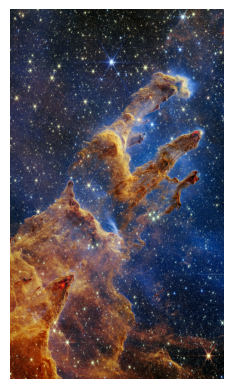

In [7]:
# Importing and visualizing image
image=Image.open("/content/Pillars of Creation.png")
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()


In [8]:
# transforming image to be suitable for our model
image=transforms.ToTensor()(image)
image=torch.unsqueeze(image,0)
image.shape

torch.Size([1, 3, 2000, 1155])

In [9]:
# check shape for conv2d weight
conv = nn.Conv2d(1, 2, kernel_size=3, padding=1, bias=False)
conv.weight.shape

torch.Size([2, 1, 3, 3])

In [10]:
# sobel shape should be same to conv2d weight
sobel_kernels = torch.tensor([[[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]],  # Horizontal
                                      [[[1, 2, 1], [0, 0, 0], [-1, -2, -1]]]],dtype=torch.float32)  # Vertical
sobel_kernels.shape

torch.Size([2, 1, 3, 3])

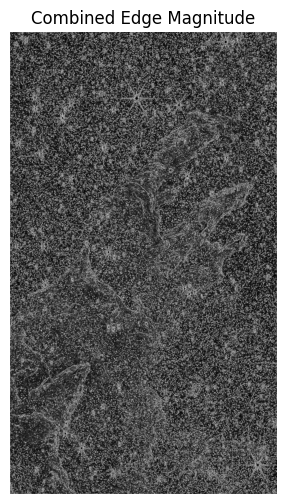

(torch.Size([2, 2000, 1155]),
 torch.Size([1, 2, 2000, 1155]),
 torch.Size([2000, 1155]))

In [11]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt


image=Image.open("/content/Pillars of Creation.png")


class SobelEdgeDetector(nn.Module):
    def __init__(self):
        super(SobelEdgeDetector, self).__init__()
        # 1 input channel (grayscale), 2 output channels (for horizontal and vertical edges)
        self.conv = nn.Conv2d(1, 2, kernel_size=3, padding=1, bias=False)
        # Sobel kernels for horizontal and vertical edge detection
        sobel_kernels = torch.tensor([[[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]],  # Horizontal
                                      [[[1, 2, 1], [0, 0, 0], [-1, -2, -1]]]],dtype=torch.float32)  # Vertical
        self.conv.weight = nn.Parameter(sobel_kernels)

    def forward(self, x):
        return self.conv(x)

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.ToTensor()  # Convert to tensor
])
image=transform(image)
image=torch.unsqueeze(image,0)
# Example usage:
sobel_detector = SobelEdgeDetector()
edges = sobel_detector(image)


# usqueeze
squeeze=edges.squeeze(0)

# seprating the horizontal and vertical edges
hor_edge=squeeze[0].detach()
ver_edge=squeeze[1].detach()

# computing the magnitude
magnitude=torch.sqrt(hor_edge**2 + ver_edge**2) #pythogerous theorem


# Visualize the Image
magnitude_image = transforms.ToPILImage()(magnitude)

# Display the combined edge image
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_image, cmap='gray')
plt.title('Combined Edge Magnitude')
plt.axis('off')
plt.show()

# looking at shapes
squeeze.shape,edges.shape,magnitude.shape


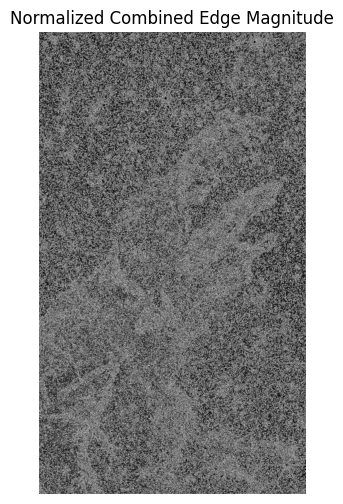

In [12]:
# normalize our single channel image
normalize_transform = transforms.Normalize(mean=[0.5], std=[0.5])  # For single channel
# Add channel and batch dimensions: (1, 1, height, width)
magnitude = magnitude.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, 2000, 1155)
normalized_magnitude = normalize_transform(magnitude)

normalized_magnitude=normalized_magnitude.squeeze(0) # removing the added dimensions

# Visualize the Image
magnitude_image = transforms.ToPILImage()(normalized_magnitude)

# Display the combined edge image
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_image, cmap='gray')
plt.title('Normalized Combined Edge Magnitude')
plt.axis('off')
plt.show()


In [13]:
normalized_magnitude.shape

torch.Size([1, 2000, 1155])